In [52]:
import os
import numpy as np
import pandas as pd
os.chdir('D:/GNN/overlapping-community-detection-master/')#更改路径，''里面为更改的路径


In [53]:
Z_pred=pd.read_csv('Z_pred.csv',sep=' ',header=None)
Z_pred

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2080,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2081,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2083,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [16]:
#Z_pred.replace(1.0,'community',inplace=True)
#Z_pred.replace(0,'Non-community',inplace=True)


In [7]:
Z_pred

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2080,0.0,1.0,0.0,0.0,0.0
2081,0.0,1.0,0.0,0.0,0.0
2082,0.0,0.0,0.0,0.0,0.0
2083,0.0,0.0,0.0,0.0,0.0


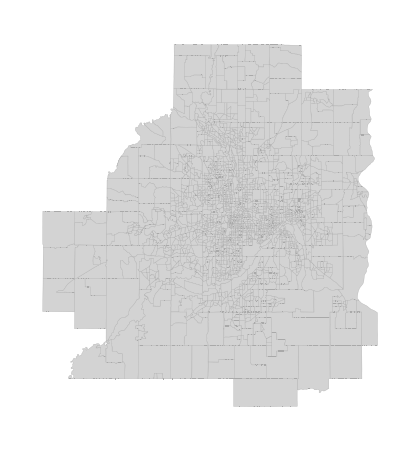

In [153]:
import os
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs

cbg_path='D:\\GNN\\sample_data_mn_20200301-20220424T172614Z-001\\sample_data_mn_20200301\\'

cbg = gpd.read_file(cbg_path+"geo/cbg_TCMA.geojson")


geoplot.polyplot(cbg, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))




In [154]:
cbg.sort_values('CensusBlockGroup',inplace=True)
cbg

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
1807,27,003,050107,1,270030501071,MN,Anoka County,H1,"MULTIPOLYGON (((-93.51007 45.41480, -93.50056 ..."
1834,27,003,050108,1,270030501081,MN,Anoka County,H1,"MULTIPOLYGON (((-93.35241 45.38921, -93.35240 ..."
1270,27,003,050108,2,270030501082,MN,Anoka County,H1,"MULTIPOLYGON (((-93.37813 45.38112, -93.37778 ..."
1271,27,003,050109,1,270030501091,MN,Anoka County,H1,"MULTIPOLYGON (((-93.26550 45.37326, -93.26550 ..."
1283,27,003,050109,2,270030501092,MN,Anoka County,H1,"MULTIPOLYGON (((-93.23550 45.41380, -93.23533 ..."
...,...,...,...,...,...,...,...,...,...
127,27,163,071400,1,271630714001,MN,Washington County,H1,"MULTIPOLYGON (((-92.98395 44.84705, -92.98395 ..."
1198,27,163,071400,2,271630714002,MN,Washington County,H1,"MULTIPOLYGON (((-92.97339 44.82688, -92.97337 ..."
242,27,163,071400,3,271630714003,MN,Washington County,H1,"MULTIPOLYGON (((-93.02150 44.78724, -93.02147 ..."
1197,27,163,071400,4,271630714004,MN,Washington County,H1,"MULTIPOLYGON (((-92.96468 44.80631, -92.96466 ..."


In [155]:
import pandas as pd

cbg['CensusBlockGroup'].apply(int)
uniqueID=cbg['CensusBlockGroup'].unique()
uniqueID.sort()
#uniqueID.shape
key=range(0,2085)
dic_id = dict(zip(key, uniqueID))
dic_id_new = dict([(value, key) for (key, value) in dic_id.items()])
cbg['INDEX']=cbg.CensusBlockGroup.map(dic_id_new)
cbg.set_index('INDEX',inplace=True)

In [156]:
cbg.query('INDEX==0')

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry
INDEX,,,,,,,,,
0,27,003,050107,1,270030501071,MN,Anoka County,H1,"MULTIPOLYGON (((-93.51007 45.41480, -93.50056 ..."


In [162]:
result=pd.concat([cbg,Z_pred],axis=1)

In [163]:
result

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry,0,1,2,3,4,5,6,7,8,9
0,27,003,050107,1,270030501071,MN,Anoka County,H1,"MULTIPOLYGON (((-93.51007 45.41480, -93.50056 ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,27,003,050108,1,270030501081,MN,Anoka County,H1,"MULTIPOLYGON (((-93.35241 45.38921, -93.35240 ...",0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,27,003,050108,2,270030501082,MN,Anoka County,H1,"MULTIPOLYGON (((-93.37813 45.38112, -93.37778 ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,27,003,050109,1,270030501091,MN,Anoka County,H1,"MULTIPOLYGON (((-93.26550 45.37326, -93.26550 ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,003,050109,2,270030501092,MN,Anoka County,H1,"MULTIPOLYGON (((-93.23550 45.41380, -93.23533 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,27,163,071400,1,271630714001,MN,Washington County,H1,"MULTIPOLYGON (((-92.98395 44.84705, -92.98395 ...",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2081,27,163,071400,2,271630714002,MN,Washington County,H1,"MULTIPOLYGON (((-92.97339 44.82688, -92.97337 ...",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2082,27,163,071400,3,271630714003,MN,Washington County,H1,"MULTIPOLYGON (((-93.02150 44.78724, -93.02147 ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2083,27,163,071400,4,271630714004,MN,Washington County,H1,"MULTIPOLYGON (((-92.96468 44.80631, -92.96466 ...",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [164]:
result.query('index==0')

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry,0,1,2,3,4,5,6,7,8,9
0,27,003,050107,1,270030501071,MN,Anoka County,H1,"MULTIPOLYGON (((-93.51007 45.41480, -93.50056 ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [165]:
result.columns

Index([       'StateFIPS',       'CountyFIPS',        'TractCode',
             'BlockGroup', 'CensusBlockGroup',            'State',
                 'County',        'ClassCode',         'geometry',
                        0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9],
      dtype='object')

KeyError: 10

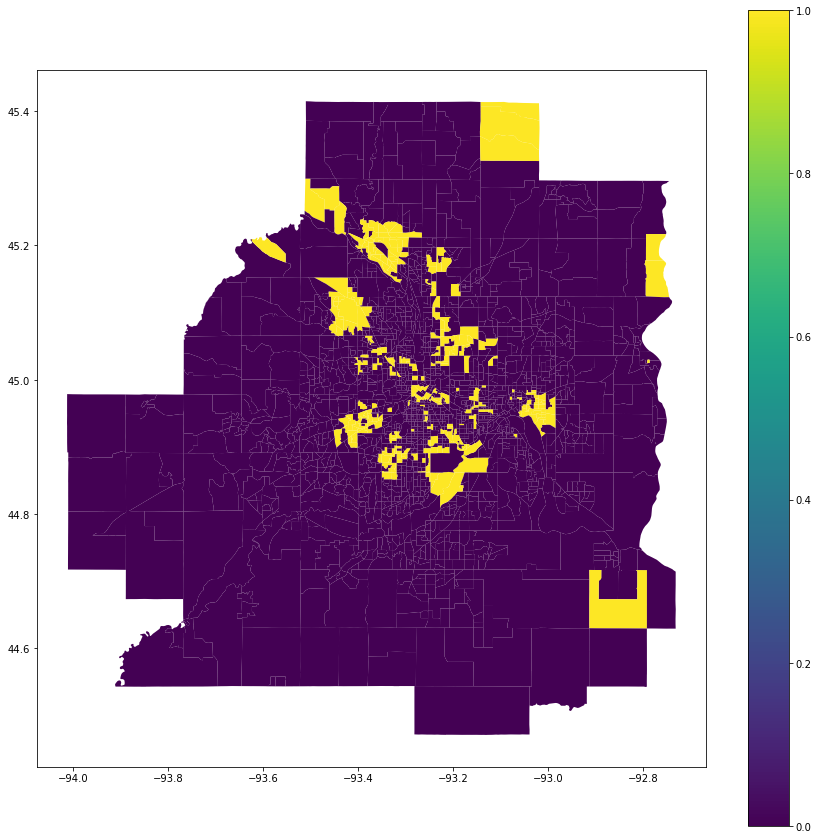

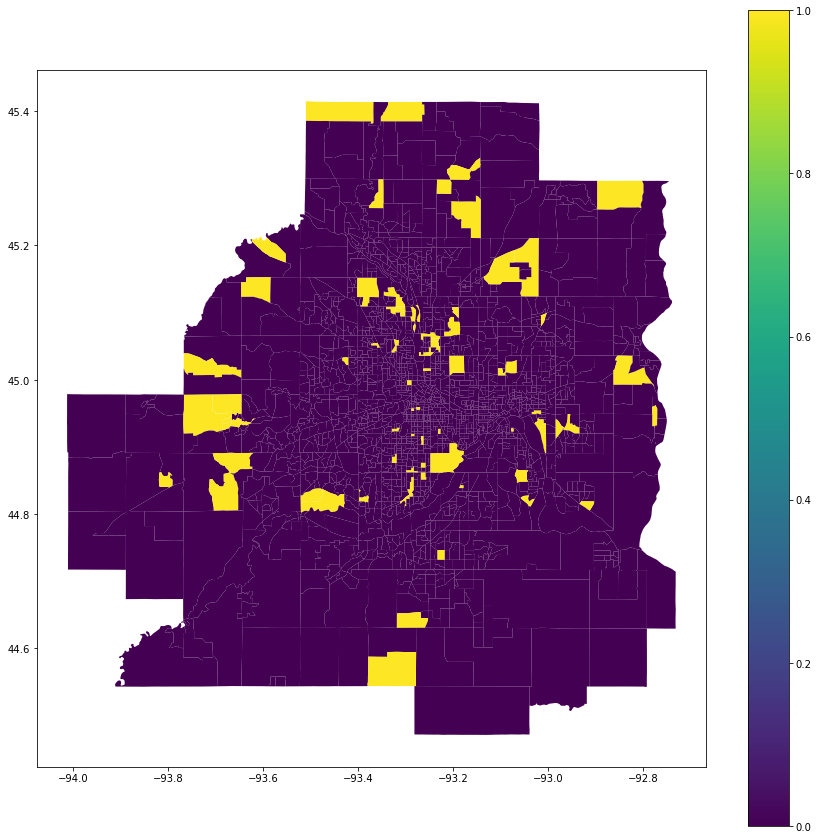

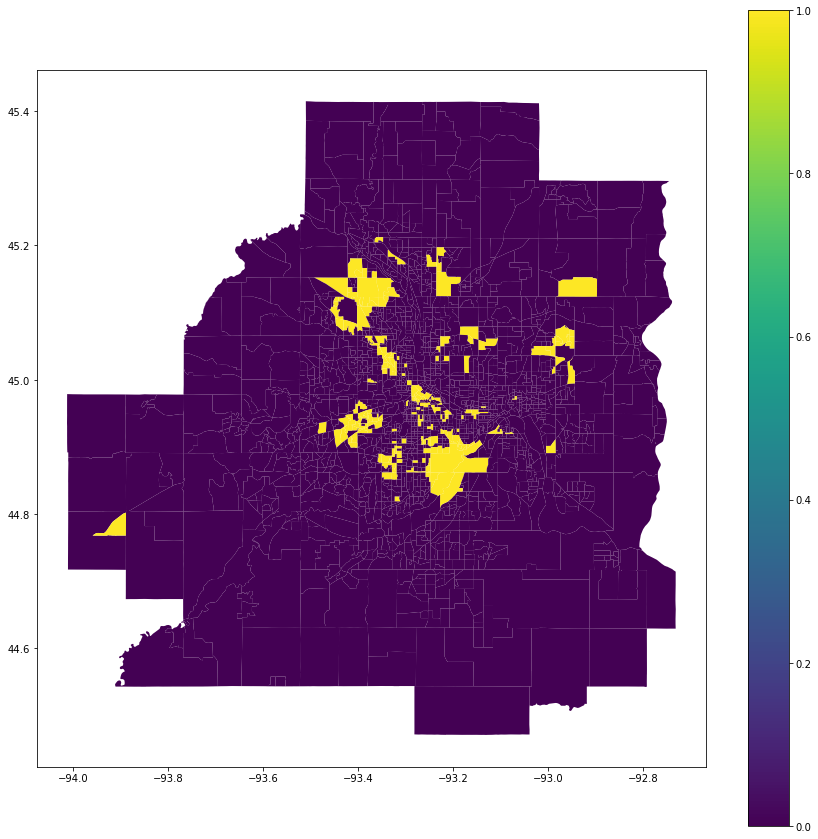

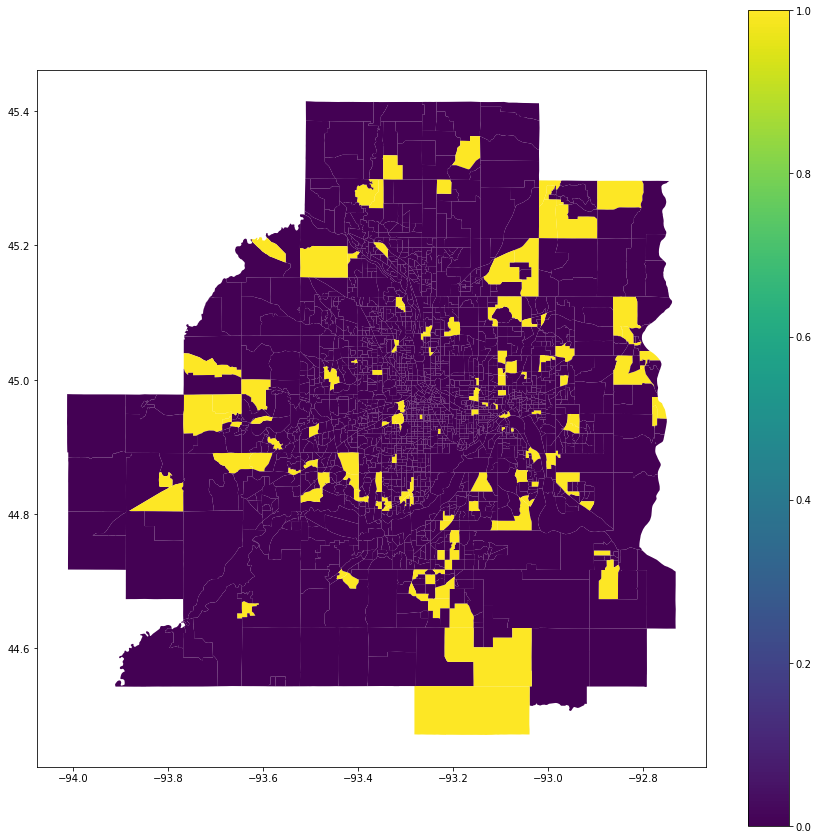

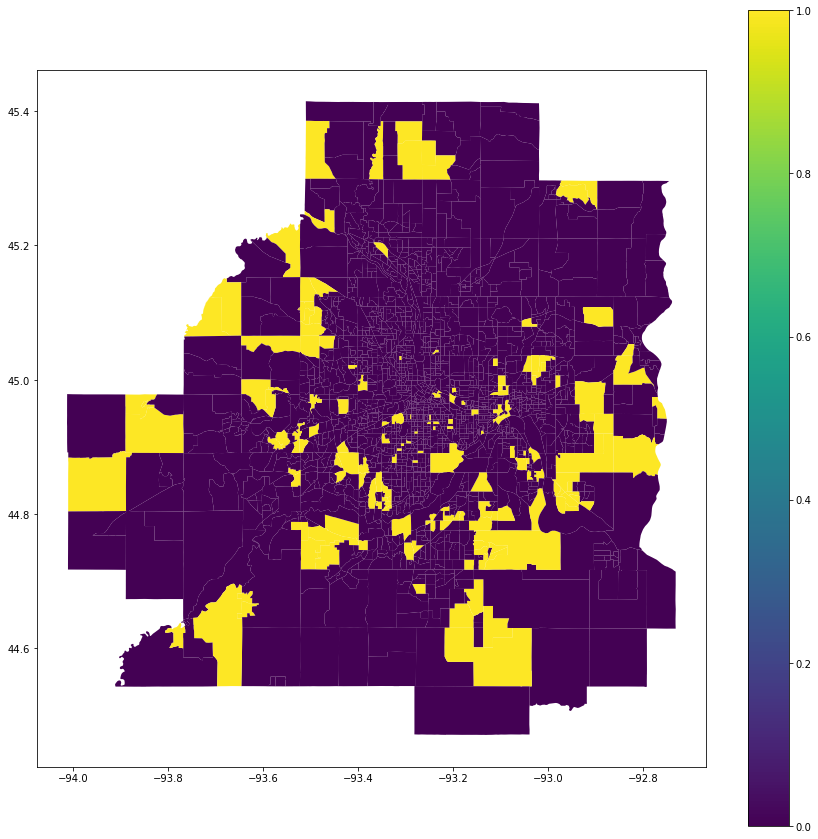

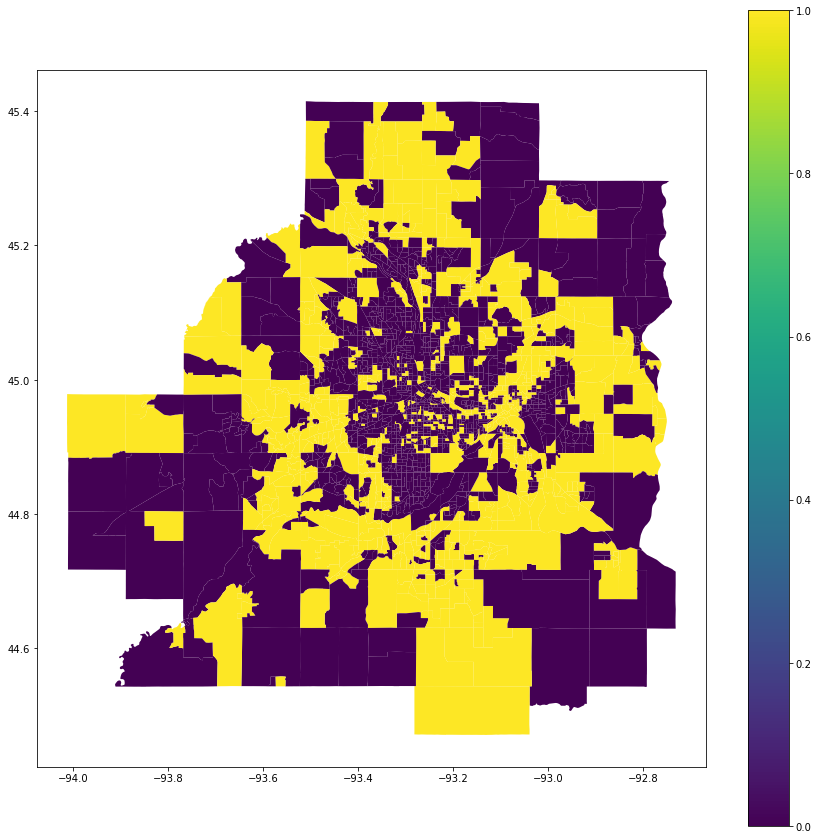

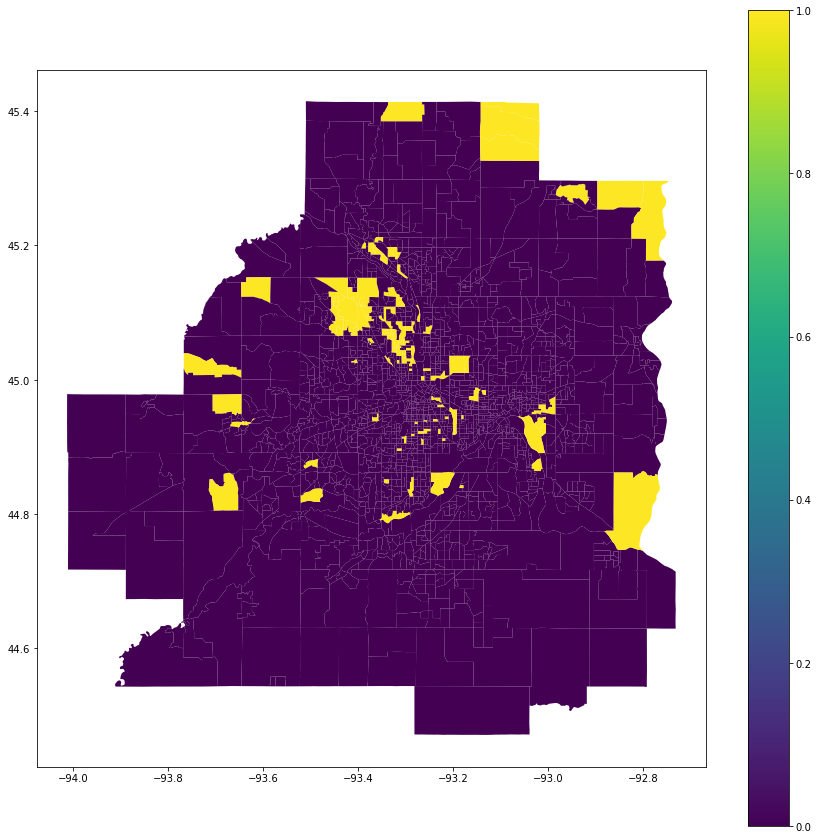

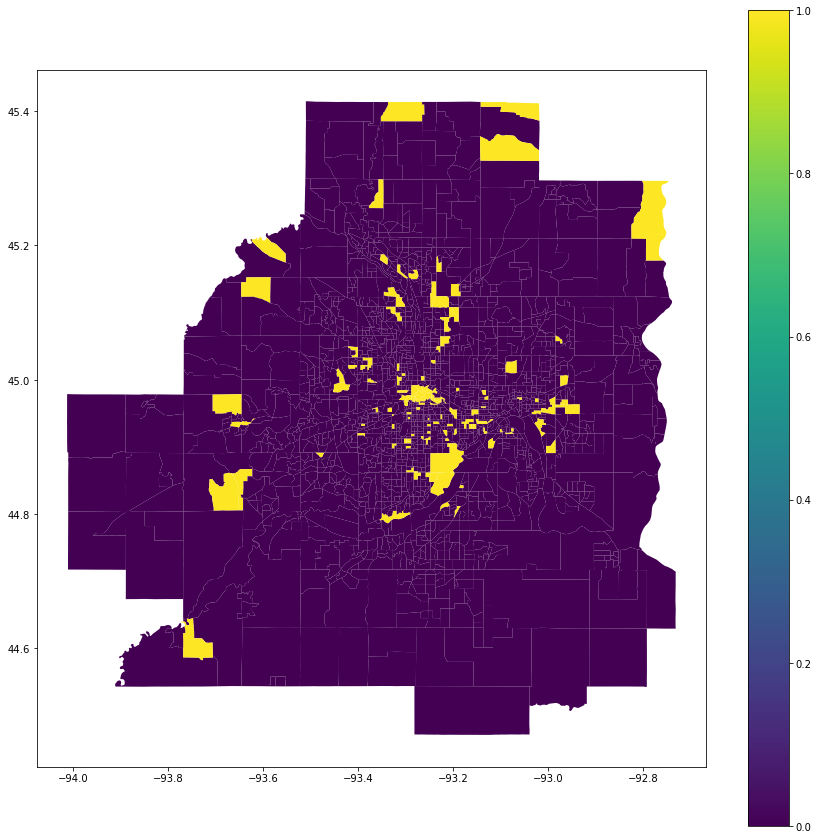

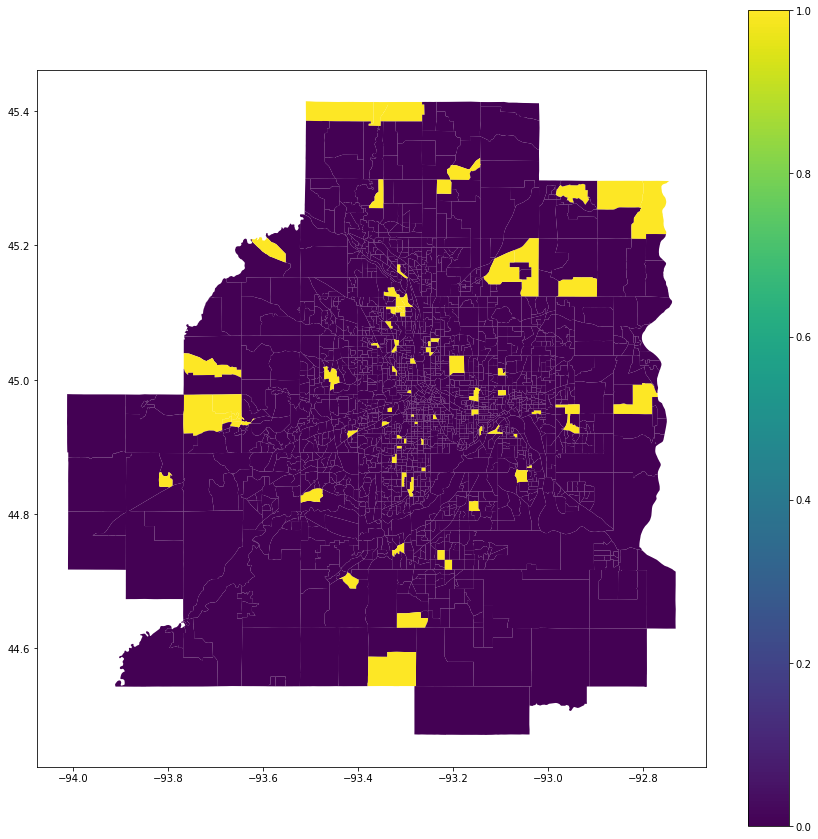

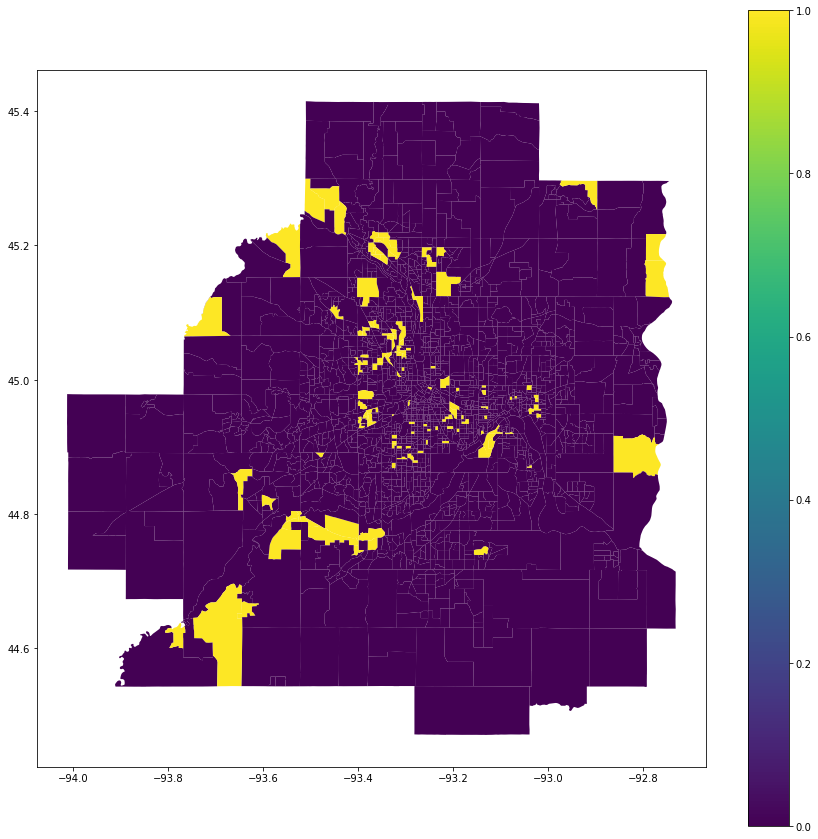

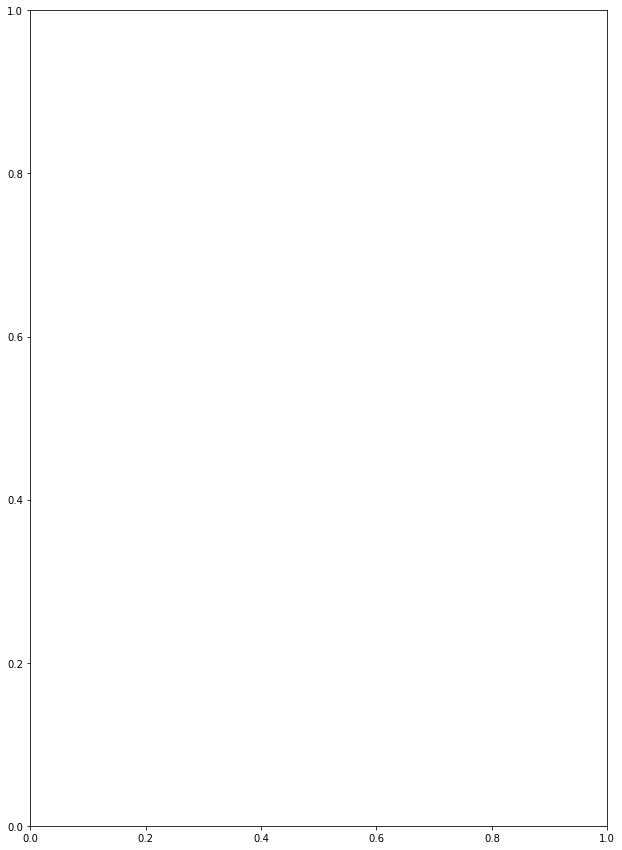

In [166]:
for i in range(30):
    result.plot(i, figsize=(15, 15),legend=True)


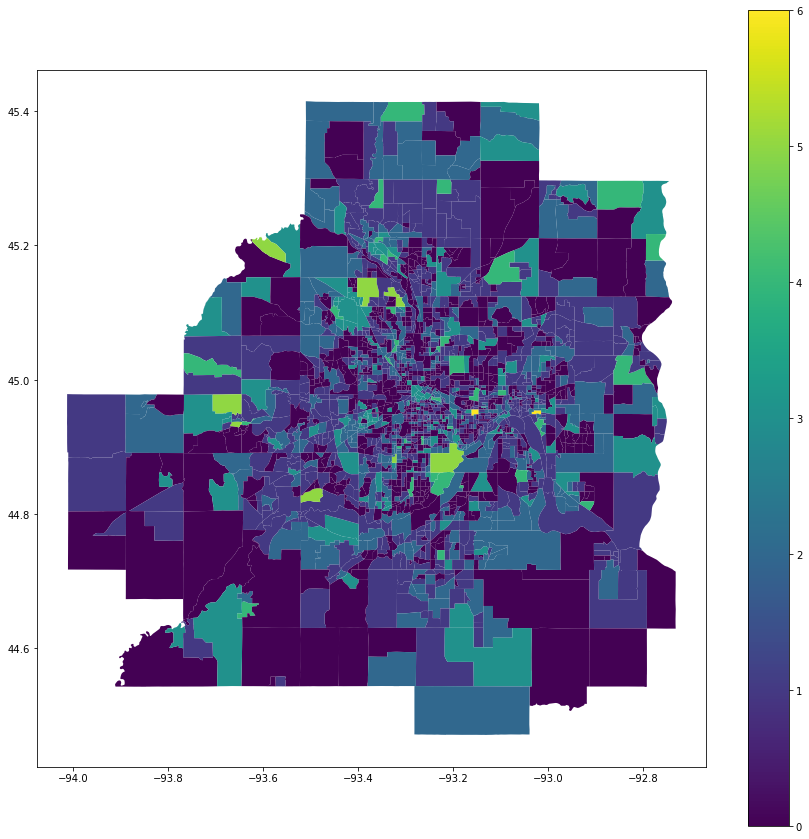

In [167]:
result['overlap_count']=result.iloc[:,9:19].sum(axis=1)
result.plot('overlap_count', figsize=(15, 15),legend=True)


In [147]:
result.columns = result.columns.astype(str)
result.to_file('overlap_30.shp')


<ipython-input-147-15fe167ec25d>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result.to_file('overlap_30.shp')


In [168]:
result

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry,0,1,2,3,4,5,6,7,8,9,overlap_count
0,27,003,050107,1,270030501071,MN,Anoka County,H1,"MULTIPOLYGON (((-93.51007 45.41480, -93.50056 ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,27,003,050108,1,270030501081,MN,Anoka County,H1,"MULTIPOLYGON (((-93.35241 45.38921, -93.35240 ...",0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0
2,27,003,050108,2,270030501082,MN,Anoka County,H1,"MULTIPOLYGON (((-93.37813 45.38112, -93.37778 ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
3,27,003,050109,1,270030501091,MN,Anoka County,H1,"MULTIPOLYGON (((-93.26550 45.37326, -93.26550 ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,27,003,050109,2,270030501092,MN,Anoka County,H1,"MULTIPOLYGON (((-93.23550 45.41380, -93.23533 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,27,163,071400,1,271630714001,MN,Washington County,H1,"MULTIPOLYGON (((-92.98395 44.84705, -92.98395 ...",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2081,27,163,071400,2,271630714002,MN,Washington County,H1,"MULTIPOLYGON (((-92.97339 44.82688, -92.97337 ...",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2082,27,163,071400,3,271630714003,MN,Washington County,H1,"MULTIPOLYGON (((-93.02150 44.78724, -93.02147 ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2083,27,163,071400,4,271630714004,MN,Washington County,H1,"MULTIPOLYGON (((-92.96468 44.80631, -92.96466 ...",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0


In [29]:
result

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry,O_id,...,2,3,4,5,6,7,8,9,overlap_count,Overalp_count
0,27,019,091100,1,270190911001,MN,Carver County,H1,"MULTIPOLYGON (((-93.76804 44.64280, -93.76804 ...",275,...,Non-community,community,community,Non-community,community,community,community,community,Non-communityNon-communityNon-communitycommuni...,6
1,27,019,091201,1,270190912011,MN,Carver County,H1,"MULTIPOLYGON (((-94.01048 44.71880, -94.01047 ...",277,...,Non-community,community,community,Non-community,community,community,community,community,communityNon-communityNon-communitycommunityco...,7
2,27,019,090800,2,270190908002,MN,Carver County,H1,"MULTIPOLYGON (((-93.61734 44.83011, -93.61261 ...",263,...,Non-community,community,community,community,community,community,community,community,communityNon-communityNon-communitycommunityco...,8
3,27,019,090100,2,270190901002,MN,Carver County,H1,"MULTIPOLYGON (((-93.88993 44.97638, -93.88990 ...",236,...,Non-community,community,community,Non-community,community,community,community,Non-community,communityNon-communityNon-communitycommunityco...,6
4,27,019,090302,1,270190903021,MN,Carver County,H1,"MULTIPOLYGON (((-93.88203 44.80464, -93.87963 ...",244,...,Non-community,community,Non-community,Non-community,Non-community,Non-community,community,Non-community,Non-communitycommunityNon-communitycommunityNo...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,27,053,006800,2,270530068002,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.28803 44.95733, -93.28802 ...",556,...,Non-community,community,community,Non-community,community,community,community,community,Non-communityNon-communityNon-communitycommuni...,6
2081,27,053,026807,3,270530268073,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.39212 45.07971, -93.39195 ...",1095,...,community,community,community,Non-community,community,community,community,community,Non-communityNon-communitycommunitycommunityco...,7
2082,27,053,022102,2,270530221022,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.38369 44.95686, -93.38120 ...",741,...,Non-community,community,community,Non-community,community,community,community,Non-community,communityNon-communityNon-communitycommunityco...,6
2083,27,053,100700,4,270531007004,MN,Hennepin County,H1,"MULTIPOLYGON (((-93.31335 45.01867, -93.31208 ...",1231,...,community,community,community,Non-community,community,community,community,community,Non-communityNon-communitycommunitycommunityco...,7


In [171]:
from scipy import sparse

A_non_sym = sparse.load_npz('A_non_sym.npz')
A_non_sym_np=A_non_sym.todense()

In [172]:
type(A_non_sym_np)

numpy.matrix

matrix([[233],
        [376],
        [296],
        ...,
        [163],
        [253],
        [189]])

In [181]:
result['O_flow']=np.sum(A_non_sym_np,axis=1)

In [186]:
result['D_flow']=np.sum(A_non_sym_np,axis=0).reshape(2085,1)

In [187]:
result

,StateFIPS,CountyFIPS,TractCode,BlockGroup,CensusBlockGroup,State,County,ClassCode,geometry,0,...,3,4,5,6,7,8,9,overlap_count,O_flow,D_flow
0,27,003,050107,1,270030501071,MN,Anoka County,H1,"MULTIPOLYGON (((-93.51007 45.41480, -93.50056 ...",0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,257,233
1,27,003,050108,1,270030501081,MN,Anoka County,H1,"MULTIPOLYGON (((-93.35241 45.38921, -93.35240 ...",0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,365,376
2,27,003,050108,2,270030501082,MN,Anoka County,H1,"MULTIPOLYGON (((-93.37813 45.38112, -93.37778 ...",0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,311,296
3,27,003,050109,1,270030501091,MN,Anoka County,H1,"MULTIPOLYGON (((-93.26550 45.37326, -93.26550 ...",0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,57,51
4,27,003,050109,2,270030501092,MN,Anoka County,H1,"MULTIPOLYGON (((-93.23550 45.41380, -93.23533 ...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,27,163,071400,1,271630714001,MN,Washington County,H1,"MULTIPOLYGON (((-92.98395 44.84705, -92.98395 ...",0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,270,248
2081,27,163,071400,2,271630714002,MN,Washington County,H1,"MULTIPOLYGON (((-92.97339 44.82688, -92.97337 ...",0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,241,206
2082,27,163,071400,3,271630714003,MN,Washington County,H1,"MULTIPOLYGON (((-93.02150 44.78724, -93.02147 ...",0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,163
2083,27,163,071400,4,271630714004,MN,Washington County,H1,"MULTIPOLYGON (((-92.96468 44.80631, -92.96466 ...",0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,206,253


In [188]:
result.to_csv('result_10.csv')

In [189]:
result.columns = result.columns.astype(str)
result.to_file('overlap_10.shp')

<ipython-input-189-d71b3925815e>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  result.to_file('overlap_10.shp')
